Solve the true problem
=================

Now that we have constructed the true problem and discretize it. The
MSPPy package provides two solvers to solve the problem.

In [1]:
%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')
from msppy.utils.examples import (construct_nvid, 
    construct_nvic, construct_nvmc, construct_nvm)
from msppy.solver import Extensive, SDDP
from msppy.evaluation import Evaluation, EvaluationTrue

Stage-wise independent discrete finite problem
--------------------------------------------------------------

Both the extensive solver and SDDP solver shows that, the optimum is $\$3.18$ and an optimal amount of newspaper to buy today is 7 for the $\textit{true problem}$

In [2]:
nvid = construct_nvid()
nvid_ext = Extensive(nvid)
nvid_ext.solve()
nvid_ext.first_stage_solution

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 22 rows, 46 columns and 55 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 13 rows and 26 columns
Presolve time: 0.04s
Presolved: 9 rows, 20 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727273e+29   9.000000e+30   2.909091e+00      0s
      13    3.1818182e+00   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.06 seconds
Optimal objective  3.181818182e+00


{'bought': 7.0}

----------------------------------------------------------------
                   SDDP Solver, Lingquan Ding                   
----------------------------------------------------------------
   Iteration               Bound               Value        Time
----------------------------------------------------------------
           1           10.000000            0.000000    0.011892
           2            5.000000            2.500000    0.009692
           3            3.500000            5.000000    0.007860
           4            3.318182            8.000000    0.002055
           5            3.227273            7.000000    0.002200
           6            3.181818            1.250000    0.004256
           7            3.181818            7.000000    0.009488
           8            3.181818            2.500000    0.005164
           9            3.181818            1.000000    0.002585
          10            3.181818            4.000000    0.003089
-------------------------

{'bought': 7.000000000000024}


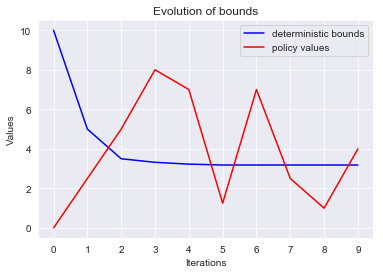

In [3]:
nvid_sddp = SDDP(nvid)
nvid_sddp.solve(max_iterations=10)
print(nvid_sddp.first_stage_solution)
res = EvaluationTrue(nvid)
res.run(n_simulations=-1)
print(res.gap)

Stage-wise independent continuous problem
-----------------------------------------------------------

In this case, for both solvers, the problem needs to be discretized. The following snippet discretizes the data process by 100 number of samples and a random seed 888. We refer the resulting disretization problem as $\textit{SAA(1)}$. Both solvers show that, for $\textit{SAA(1)}$, the optimum is $\$2.79$ and an optimal amount of newspaper to buy today is 9.08

In [5]:
nvic = construct_nvic()
nvic.discretize(random_state=1, n_samples=100)
nvic_ext = Extensive(nvic)
nvic_ext.solve()
nvic_ext.first_stage_solution

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 200 rows, 402 columns and 500 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-03, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-02, 3e+02]
Presolve removed 100 rows and 201 columns
Presolve time: 0.01s
Presolved: 100 rows, 201 columns, 300 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6150000e+30   1.000000e+32   1.292000e+01      0s
     159    2.7927114e+00   0.000000e+00   0.000000e+00      0s

Solved in 159 iterations and 0.02 seconds
Optimal objective  2.792711442e+00


{'bought': 9.082937518406201}

----------------------------------------------------------------
                   SDDP Solver, Lingquan Ding                   
----------------------------------------------------------------
   Iteration               Bound               Value        Time
----------------------------------------------------------------
           1           50.000000            0.000000    0.015636
           2            8.349073          -15.411247    0.012933
           3            3.126525           -0.086403    0.044057
           4            2.916262           22.092621    0.013228
           5            2.843520            1.948731    0.012971
           6            2.808904           10.772448    0.011250
           7            2.798583            9.387801    0.010525
           8            2.793949            8.974973    0.010659
           9            2.792711            9.206693    0.009225
          10            2.792711           -1.708884    0.017468
-------------------------

{'bought': 9.082937518406089}


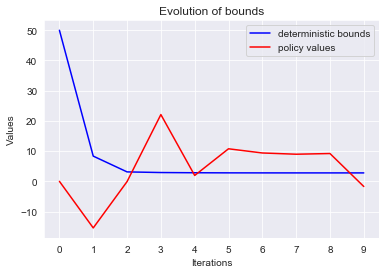

In [6]:
nvic_sddp = SDDP(nvic)
nvic_sddp.solve(max_iterations=10)
print(nvic_sddp.first_stage_solution)
res = Evaluation(nvic)
res.run(n_simulations=-1)
print(res.gap)

But our intention is solve the true problem rather than the SAA(1). The advantage of SDDP solver is that by solving SAA(1), it also offers a policy to the $\textit{true problem}$ (though not optimal). By simulation as follows, the 95% confidence interval of the value of the obtained policy on the $\textit{true problem}$ is [3.10,3.37]. Therefore, we conclude that by solving SAA(1), the SDDP solver provides you with a policy whose value is within [3.10,3.37] with 95% confidence for the $\textit{true problem}$.

In [8]:
res_true = EvaluationTrue(nvid)
res_true.run(n_simulations=3000, percentile=95)
res_true.CI

(3.102969934241783, 3.372030065758215)

Markov chain problem
-----------------------------

Both the extensive solver and SDDP solver shows that, the optimum is $\$9.05$ and an optimal amount of newspaper to buy today is 6 for the $\textit{true problem}$

In [9]:
nvmc = construct_nvmc()
nvmc_ext = Extensive(nvmc)
nvmc_ext.solve()
nvmc_ext.first_stage_solution

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 12 rows, 26 columns and 30 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 6e+00]
Presolve removed 11 rows and 23 columns
Presolve time: 0.02s
Presolved: 1 rows, 3 columns, 3 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5000000e+29   1.000000e+30   1.500000e-01      0s
       2    9.0500000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.03 seconds
Optimal objective  9.050000000e+00


{'bought': 6.0}

----------------------------------------------------------------
                   SDDP Solver, Lingquan Ding                   
----------------------------------------------------------------
   Iteration               Bound               Value        Time
----------------------------------------------------------------
           1           75.000000            0.000000    0.005299
           2           12.500000          -22.500000    0.003193
           3            9.850000            3.300000    0.006762
           4            9.200000            9.300000    0.005378
           5            9.050000            9.700000    0.005474
           6            9.050000            9.000000    0.003131
           7            9.050000           10.000000    0.007389
           8            9.050000            9.000000    0.003147
           9            9.050000           10.000000    0.004776
          10            9.050000            9.000000    0.002887
-------------------------

{'bought': 5.999999999999999}


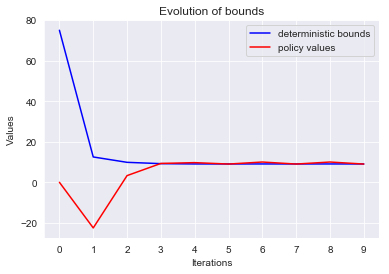

In [10]:
nvmc_sddp = SDDP(nvmc)
nvmc_sddp.solve(max_iterations=10)
print(nvmc_sddp.first_stage_solution)
nvmc_sddp.plot_bounds();

In [11]:
res = Evaluation(nvmc)
res.run(n_simulations=-1)
res.gap

0.0

Markovian continuous problem
----------------------------------------

In this case, for both solvers, the problem needs to be discretized. The following snippet ten dimensional Markov chain using stochastic approximation method (stochastic gradient descent) with 1000 iterations. We refer the resulting disretization problem as $\textit{MC}$. Both solvers show that, for $\textit{MC}$, the optimum is $\$2.67$ and an optimal amount of newspaper to buy today is 17.76

In [12]:
nvm = construct_nvm()
nvm.discretize(n_Markov_states=10, n_sample_paths=1000, method='SA');
nvm_ext = Extensive(nvm)
nvm_ext.solve(outputFlag=0)
nvm_ext.first_stage_solution

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


{'bought': 17.766702738079392}

{'bought': 17.76670273807937}


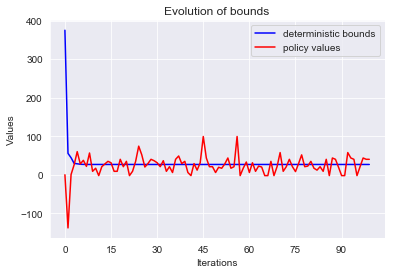

In [13]:
nvm_sddp = SDDP(nvm)
nvm_sddp.solve(max_iterations=100, logToConsole=0)
print(nvm_sddp.first_stage_solution)
nvm_sddp.plot_bounds();

In [14]:
res = Evaluation(nvm)
res.run(n_simulations=-1)
res.gap

1.3270230966127594e-16

But our intention is solve the true problem rather than the $\textit{MC}$. The advantage of SDDP solver is that by solving $\textit{MC}$, it also offers a policy to the $\textit{true problem}$ (though not guaranteed to be optimal). By simulation as follows, the 95% confidence interval of the value of the obtained policy on the $\textit{true problem}$ is [26.54,27.99]. Therefore, we conclude that by solving $\textit{MC}$, the SDDP solver provides you with a policy whose value is within [26.54,27.99] with 95% confidence for the $\textit{true problem}$.

In [15]:
res_true = EvaluationTrue(nvm)
res_true.run(n_simulations=3000)
res_true.CI

(26.53884160940781, 27.99346597230838)